In [2]:
import os
import re

import jax
import tensorflow as tf
import matplotlib.pyplot as plt

import ml_collections

from molnet.data import input_pipeline
from configs import root_dirs, test

2024-11-05 13:47:02.286318: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
config = test.get_config()
config.root_dir = root_dirs.get_root_dir()

In [4]:
rng = jax.random.PRNGKey(0)
datarng, rng = jax.random.split(rng)
datasets = input_pipeline.get_datasets(rng, config)

ds = datasets['val']
batch = next(ds)


2024-11-05 13:47:08.731806: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:1: Invalid control characters encountered in text.
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSnapshotMetadata: 1:3: Expected identifier, got: 12126270835042841805
[libprotobuf ERROR external/com_google_protobuf/src/google/protobuf/text_format.cc:337] Error parsing text-format tensorflow.data.experimental.DistributedSna

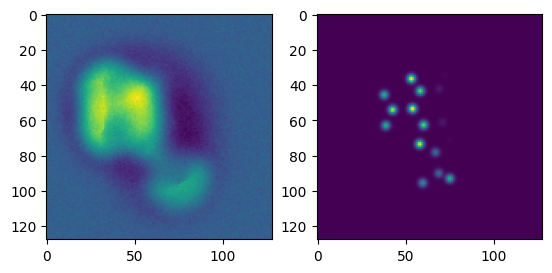

In [7]:
x = batch['images'][0]
preds_z = x.shape[-2]
y = batch['atom_map'][0]
y = y[..., -preds_z:, :]

ax = plt.subplot(1, 2, 1)
plt.imshow(x[..., -1, 0])

ax = plt.subplot(1, 2, 2)
plt.imshow(y.mean(axis=(-1, -2)))